In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib as mpl
from matplotlib import pyplot as plt

In [15]:
conn = sqlite3.connect('../data/sql_data/NYC_bikes_2018.sqlite')
cur = conn.cursor()

In [2]:
%load_ext sql
%sql sqlite:///../data/sql_data/NYC_bikes_2018.sqlite

'Connected: @../data/sql_data/NYC_bikes_2018.sqlite'

In [3]:
%%sql
SELECT * FROM sqlite_master WHERE "type"='table';

 * sqlite:///../data/sql_data/NYC_bikes_2018.sqlite
Done.


[('table', 'usertypes', 'usertypes', 2, 'CREATE TABLE usertypes (ID INTEGER PRIMARY KEY NOT NULL, usertype TEXT)'),
 ('table', 'trips', 'trips', 285098, 'CREATE TABLE "trips" (\n"tripduration" INTEGER,\n  "starttime" TIMESTAMP,\n  "stoptime" TIMESTAMP,\n  "start_station_id" INTEGER,\n  "end_station_id" INTEGER,\n  "bikeid" INTEGER,\n  "usertype" INTEGER,\n  "birth_year" INTEGER,\n  "gender" INTEGER\n)'),
 ('table', 'stations', 'stations', 327611, 'CREATE TABLE "stations" (\n"station_id" INTEGER,\n  "lat" REAL,\n  "lon" REAL,\n  "station_name" TEXT\n)')]

In [8]:
%%sql
SELECT starttime, strftime('%H',starttime) FROM trips LIMIT 1

 * sqlite:///../data/sql_data/NYC_bikes_2018.sqlite
Done.


[('2018-01-01 13:50:57.434000', '13')]

In [4]:
%%sql
SELECT COUNT(*) FROM trips

 * sqlite:///../data/sql_data/NYC_bikes_2018.sqlite
Done.


[(17494122,)]

In [ ]:
cur.execute('''SELECT 
    start_station_id,
    end_station_id,
    COUNT(*) AS num,
    (SELECT lat AS ss_lat FROM stations WHERE station_id = trips.start_station_id),
    (SELECT lon AS ss_lon FROM stations WHERE station_id = trips.start_station_id),
    (SELECT lat AS es_lat FROM stations WHERE station_id = trips.end_station_id),
    (SELECT lon AS es_lon FROM stations WHERE station_id = trips.end_station_id) 
FROM trips
GROUP BY  start_station_id, end_station_id''')
conn.commit()

In [10]:
query = '''SELECT 
    start_station_id,
    end_station_id,
    COUNT(*) AS num,
    (SELECT lat FROM stations WHERE station_id = trips.start_station_id) AS ss_lat,
    (SELECT lon FROM stations WHERE station_id = trips.start_station_id) AS ss_lon,
    (SELECT lat FROM stations WHERE station_id = trips.end_station_id) AS es_lat,
    (SELECT lon FROM stations WHERE station_id = trips.end_station_id) AS es_lon
FROM trips
WHERE start_station_id != end_station_id
GROUP BY  start_station_id, end_station_id'''

In [11]:
pd.read_sql_query(query, conn)

start_station_id  end_station_id  num     ss_lat     ss_lon  \
0                     72              79   50  40.767272 -73.993929   
1                     72              82    1  40.767272 -73.993929   
2                     72             127  248  40.767272 -73.993929   
3                     72             128   66  40.767272 -73.993929   
4                     72             146   31  40.767272 -73.993929   
5                     72             150   14  40.767272 -73.993929   
6                     72             151   55  40.767272 -73.993929   
7                     72             152    5  40.767272 -73.993929   
8                     72             161   38  40.767272 -73.993929   
9                     72             164   39  40.767272 -73.993929   
10                    72             167   37  40.767272 -73.993929   
11                    72             168  143  40.767272 -73.993929   
12                    72             173  941  40.767272 -73.993929   
13                    72             174    9  40.767272 -73.993929   
14                    72             195   92  40.767272 -73.993929   
15                    72             212  397  40.767272 -73.993929   
16                    72             216    1  40.767272 -73.993929   
17                    72             223   55  40.767272 -73.993929   
18                    72             228   65  40.767272 -73.993929   
19                    72             229   21  40.767272 -73.993929   
20                    72             236   27  40.767272 -73.993929   
21                    72             237   29  40.767272 -73.993929   
22                    72             238  304  40.767272 -73.993929   
23                    72             245    5  40.767272 -73.993929   
24                    72             247   70  40.767272 -73.993929   
25                    72             248   27  40.767272 -73.993929   
26                    72             249   38  40.767272 -73.993929   
27                    72             251   20  40.767272 -73.993929   
28                    72             252   27  40.767272 -73.993929   
29                    72             253   34  40.767272 -73.993929   
...                  ...             ...  ...        ...        ...   
345127              3721            3572    3  40.767549 -73.920933   
345128              3721            3573    2  40.767549 -73.920933   
345129              3721            3575    1  40.767549 -73.920933   
345130              3721            3577    1  40.767549 -73.920933   
345131              3721            3588    1  40.767549 -73.920933   
345132              3721            3589    5  40.767549 -73.920933   
345133              3721            3591    3  40.767549 -73.920933   
345134              3721            3592   14  40.767549 -73.920933   
345135              3721            3593   17  40.767549 -73.920933   
345136              3721            3595    3  40.767549 -73.920933   
345137              3721            3597    3  40.767549 -73.920933   
345138              3721            3598    1  40.767549 -73.920933   
345139              3721            3602    8  40.767549 -73.920933   
345140              3721            3603    4  40.767549 -73.920933   
345141              3721            3605   13  40.767549 -73.920933   
345142              3721            3607    9  40.767549 -73.920933   
345143              3721            3609    7  40.767549 -73.920933   
345144              3721            3610    3  40.767549 -73.920933   
345145              3721            3611    2  40.767549 -73.920933   
345146              3721            3612    6  40.767549 -73.920933   
345147              3721            3614    6  40.767549 -73.920933   
345148              3721            3615    2  40.767549 -73.920933   
345149              3721            3616    4  40.767549 -73.920933   
345150              3721            3617    1  40.767549 -73.920933   
345151              3721        

In [12]:
trips_df = _

In [14]:
trips_df.to_pickle('../data/pickles/trips_2018_df.pkl')

In [17]:
trips_df = pd.read_pickle('../data/pickles/trips_2018_df.pkl')

In [26]:
trips_df['dist'] = np.sqrt((trips_df['ss_lat']-trips_df['es_lat'])**2 + 0.425*(trips_df['ss_lon']-trips_df['es_lon'])**2)
trips_df['tot_dist'] = trips_df['num']*trips_df['dist']

In [30]:
trips_ss_gb = trips_df.groupby('start_station_id')
tot_dist_out = trips_ss_gb['tot_dist'].sum()
tot_num_out = trips_ss_gb['num'].sum()
trips_es_gb = trips_df.groupby('end_station_id')
tot_dist_in = trips_es_gb['tot_dist'].sum() 
tot_num_in = trips_es_gb['num'].sum()

In [276]:
avg_dist_by_station = (tot_dist_out + tot_dist_in)/(tot_num_in + tot_num_out)
avg_dist_by_station[avg_dist_by_station.isnull()].head()

3183   NaN
3184   NaN
3185   NaN
3186   NaN
3187   NaN
dtype: float64

In [277]:
query = '''
SELECT station_id, lat, lon FROM stations'''
stations_df = pd.read_sql_query(query, conn)

In [278]:
stations_df.set_index('station_id',inplace=True)
stations_df['avg_dist'] = avg_dist_by_station
stations_df['tot_trips'] = tot_num_in + tot_num_out

In [281]:
stations_df.head()

lat        lon  avg_dist  tot_trips
station_id                                           
72          40.767272 -73.993929  0.022171    75127.0
79          40.719116 -74.006667  0.015413    53630.0
82          40.711174 -74.000165  0.010969    19936.0
83          40.683826 -73.976323  0.013118    26492.0
119         40.696089 -73.978034  0.011802     6873.0

In [282]:
stations_df.dropna(inplace = True)
stations_df.head()

lat        lon  avg_dist  tot_trips
station_id                                           
72          40.767272 -73.993929  0.022171    75127.0
79          40.719116 -74.006667  0.015413    53630.0
82          40.711174 -74.000165  0.010969    19936.0
83          40.683826 -73.976323  0.013118    26492.0
119         40.696089 -73.978034  0.011802     6873.0

In [285]:
null_ind = stations_df[stations_df['avg_dist'].isnull()].index
trips_df.set_index('end_station_id').loc[null_ind]

Empty DataFrame
Columns: [start_station_id, num, ss_lat, ss_lon, es_lat, es_lon, dist, tot_dist]
Index: []

In [2]:
def bike_traffic(df, tup):
    dists = df['tot_trips']*np.exp(-((df['lat'] - tup[0])**2 + .425*(df['lon'] - tup[1])**2)/df['avg_dist']**2)
    return dists.sum()

#stations_df.to_pickle('../data/pickles/bike_traffic_params.pkl')
stations_df = pd.read_pickle('../data/pickles/bike_traffic_params.pkl')

## Heatmap of bike traffic intensity

In [3]:
bb = [[stations_df['lat'].min()-.01,stations_df['lat'].max()+.01],[stations_df['lon'].min()-.01,stations_df['lon'].max()+.01]]
bb

[[40.645399774478314, 40.82439443791581], [-74.03535319328309, -73.8977436]]

In [31]:
def bike_traffic_test(df, arr1, arr2):
    z = np.zeros(shape=(arr1.size,arr2.size))
    for iy, y in enumerate(arr1):
        for ix, x in enumerate(arr2):
            z[iy,ix] = (df['tot_trips']*np.exp(-((df['lat'] - y)**2 + .425*(df['lon'] - x)**2)*2/df['avg_dist']**2)).sum()
    return z

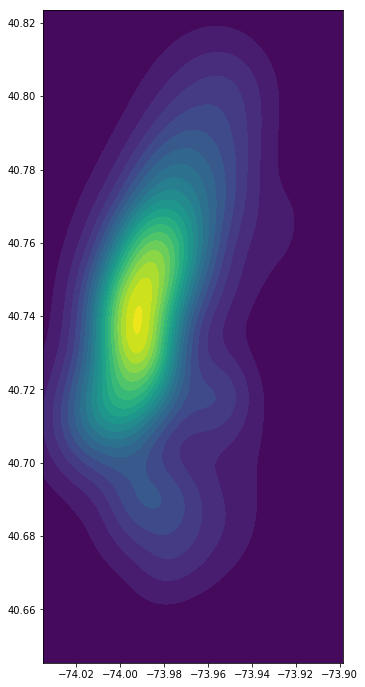

In [32]:
fig = plt.figure(figsize = (12,12))
ax = plt.gca()
ax.set_aspect(1.67)
y = np.arange(bb[0][0],bb[0][1],.001)
x = np.arange(bb[1][0],bb[1][1],.001)
xx, yy = np.meshgrid(y, x, sparse=True)
z = bike_traffic_test(stations_df,y,x)
h = plt.contourf(x,y,z,levels = 20)
plt.show()

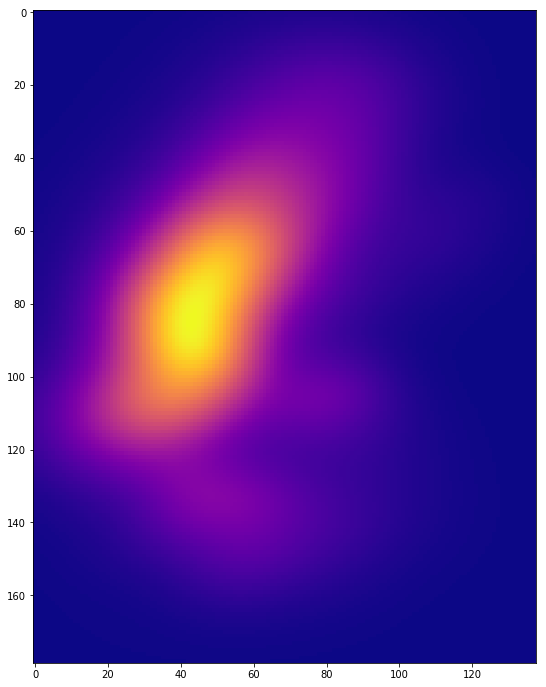

In [33]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
ax.set_aspect(0.1)
plt.imshow(np.flip(z,axis=0), cmap='plasma',interpolation='nearest', aspect = 4/3)
plt.savefig('../Images/bike_traffic_2018_est.png')
plt.show()